### import necessariy modules


In [1]:
import json
import glob
import traceback
from gensim.models import KeyedVectors
from calculate_distance import CalculateDistance
from calculate_bias import calculate_bias_for_all_embedding
from utils import populate_b2e_dict_for_words
from word_sets import ISLAMIC_WORDS, CHRISTIAN_WORDS, TERROR_WORDS, TERROR_WORD_ENGLISH
from plot_utils import get_association_subplot, get_bias_plot, get_all_bias_in_single_plot_year_vs_label,get_all_bias_in_single_plot_label_vs_year
from plot_utils import get_correlation_heatmap

### load islam, christian & terror wordlist

In [2]:
target_groups = [TERROR_WORDS]
target_group_labels = ['terror']

reference_groups = [ISLAMIC_WORDS, CHRISTIAN_WORDS]
reference_group_labels = ['islamic', 'christian']

print('target group -->')
for group, labels in zip(target_groups, target_group_labels):
    print(labels, group)

print('reference group -->')
for group, labels in zip(reference_groups, reference_group_labels):
    print(labels, group)



b2e_dict = populate_b2e_dict_for_words(TERROR_WORDS, TERROR_WORD_ENGLISH)


target group -->
terror ['সন্ত্রাস', 'সন্ত্রাসবাদ', 'সহিংসতা', 'আক্রমণ', 'মৃত্যু', 'সামরিক', 'যুদ্ধ', 'উগ্র', 'আঘাত', 'বোমা', 'লক্ষ্য', 'সংঘাত', 'বিপজ্জনক', 'হত্যা', 'নিহত', 'লড়াই', 'বাহিনী', 'দুর্গ', 'ধ্বংসযজ্ঞ', 'আগ্রাসন', 'জবাই', 'উত্থান', 'হতাহত', 'গণহত্যা', 'প্রতিশোধ', 'বিস্তার', 'মিলিশিয়া', 'শত্রুতা', 'ধ্বংসস্তূপ', 'অ্যাসিড', 'ফাঁসি', 'জঙ্গি', 'রকেট', 'গেরিলা', 'ত্যাগ', 'শত্রু', 'সৈনিক', 'জঙ্গী', 'ক্ষেপণাস্ত্র', 'বৈরী', 'বিপ্লব', 'প্রতিরোধ', 'গুলি']
reference group -->
islamic ['সালাত', 'আল্লাহ', 'রাসুল', 'নবী', 'মুসলিম', 'ইসলাম', 'নামাজ', 'ঈদ', 'ঈমান', 'হিজাব']
christian ['বাপটিজম', 'মসিহ', 'ক্যাথলিক', 'পুনুর্ত্থান', 'খ্রিষ্টান', 'পরিত্রাণ', 'প্রটেস্টান্ট', 'গসপেল', 'ট্রিনিটি', 'যিশু', 'ক্রস', 'চার্চ', 'বাইবেল', 'যীশু', 'যিশু']


In [3]:
calculate_association_distance = CalculateDistance()
calculate_association_distance.set_target_word_groups(target_word_groups=target_groups, target_group_labels=target_group_labels)
calculate_association_distance.set_reference_word_groups(reference_word_groups=reference_groups, reference_group_labels=reference_group_labels)

word লড়াই not in embedding 
word মিলিশিয়া not in embedding 
word ধ্বংসস্তূপ not in embedding 
word বাপটিজম not in embedding 
word পুনুর্ত্থান not in embedding 
word খ্রিষ্টান not in embedding 
word প্রটেস্টান্ট not in embedding 


Traceback (most recent call last):
  File "/home/saurav_workspace/newspaper-biasness-analysis/calculate_distance.py", line 31, in __get_group_centroid
    word_vector = model.get_vector(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 471, in get_vector
    return self.word_vec(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 468, in word_vec
    raise KeyError("word '%s' not in vocabulary" % word)
KeyError: "word 'বাপটিজম' not in vocabulary"
Traceback (most recent call last):
  File "/home/saurav_workspace/newspaper-biasness-analysis/calculate_distance.py", line 31, in __get_group_centroid
    word_vector = model.get_vector(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 471, in get_vector
    return self.word_vec(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 4

word লড়াই not in embedding 
word মিলিশিয়া not in embedding 
word ধ্বংসস্তূপ not in embedding 


  File "/home/saurav_workspace/newspaper-biasness-analysis/calculate_distance.py", line 31, in __get_group_centroid
    word_vector = model.get_vector(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 471, in get_vector
    return self.word_vec(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 468, in word_vec
    raise KeyError("word '%s' not in vocabulary" % word)
KeyError: "word 'প্রটেস্টান্ট' not in vocabulary"


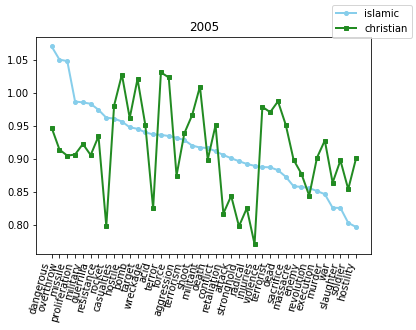

word মিলিশিয়া not in embedding 
word বাপটিজম not in embedding 
word পুনুর্ত্থান not in embedding 
word মিলিশিয়া not in embedding 


Traceback (most recent call last):
  File "/home/saurav_workspace/newspaper-biasness-analysis/calculate_distance.py", line 31, in __get_group_centroid
    word_vector = model.get_vector(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 471, in get_vector
    return self.word_vec(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 468, in word_vec
    raise KeyError("word '%s' not in vocabulary" % word)
KeyError: "word 'বাপটিজম' not in vocabulary"
Traceback (most recent call last):
  File "/home/saurav_workspace/newspaper-biasness-analysis/calculate_distance.py", line 31, in __get_group_centroid
    word_vector = model.get_vector(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 471, in get_vector
    return self.word_vec(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 4

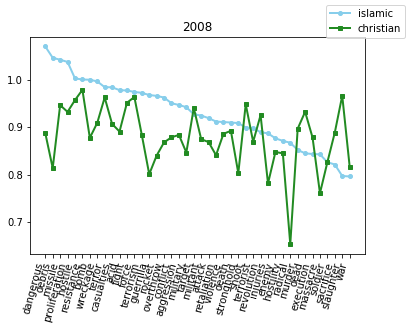

word বাপটিজম not in embedding 
word পুনুর্ত্থান not in embedding 


Traceback (most recent call last):
  File "/home/saurav_workspace/newspaper-biasness-analysis/calculate_distance.py", line 31, in __get_group_centroid
    word_vector = model.get_vector(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 471, in get_vector
    return self.word_vec(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 468, in word_vec
    raise KeyError("word '%s' not in vocabulary" % word)
KeyError: "word 'বাপটিজম' not in vocabulary"
Traceback (most recent call last):
  File "/home/saurav_workspace/newspaper-biasness-analysis/calculate_distance.py", line 31, in __get_group_centroid
    word_vector = model.get_vector(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 471, in get_vector
    return self.word_vec(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 4

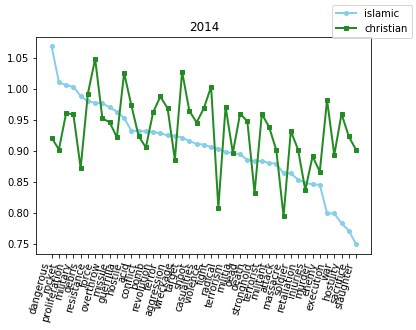

word বাপটিজম not in embedding 
word পুনুর্ত্থান not in embedding 


Traceback (most recent call last):
  File "/home/saurav_workspace/newspaper-biasness-analysis/calculate_distance.py", line 31, in __get_group_centroid
    word_vector = model.get_vector(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 471, in get_vector
    return self.word_vec(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 468, in word_vec
    raise KeyError("word '%s' not in vocabulary" % word)
KeyError: "word 'বাপটিজম' not in vocabulary"
Traceback (most recent call last):
  File "/home/saurav_workspace/newspaper-biasness-analysis/calculate_distance.py", line 31, in __get_group_centroid
    word_vector = model.get_vector(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 471, in get_vector
    return self.word_vec(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 4

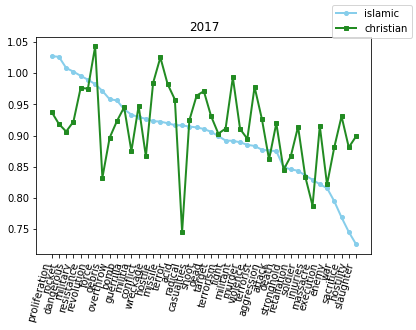

word বাপটিজম not in embedding 
word পুনুর্ত্থান not in embedding 


Traceback (most recent call last):
  File "/home/saurav_workspace/newspaper-biasness-analysis/calculate_distance.py", line 31, in __get_group_centroid
    word_vector = model.get_vector(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 471, in get_vector
    return self.word_vec(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 468, in word_vec
    raise KeyError("word '%s' not in vocabulary" % word)
KeyError: "word 'বাপটিজম' not in vocabulary"
Traceback (most recent call last):
  File "/home/saurav_workspace/newspaper-biasness-analysis/calculate_distance.py", line 31, in __get_group_centroid
    word_vector = model.get_vector(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 471, in get_vector
    return self.word_vec(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 4

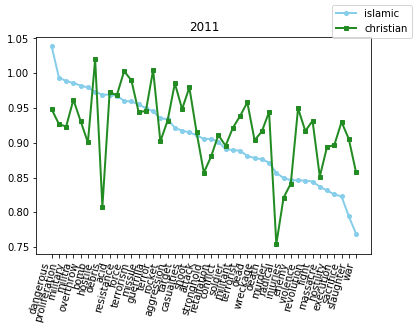

In [4]:
association_dict = {}
model_dir = '../newspaper_embedding/models/year-wise/txt/'
filenames = glob.glob(model_dir + '*txt')
for filename in filenames:
    newspaper_name = filename.split('/')[-1].split('_')[0]
    target_wise_association_for_this_paper = {}
    model = KeyedVectors.load_word2vec_format(filename, binary=False)
    target_wise_association_for_this_paper = calculate_association_distance.get_association_for_provided_embedding(model=model)
    association_dict[newspaper_name] = target_wise_association_for_this_paper
    
    get_association_subplot(target_wise_association_for_this_paper=target_wise_association_for_this_paper, b2e_dict = b2e_dict, title= newspaper_name)

### Calculate male bias for all embedding

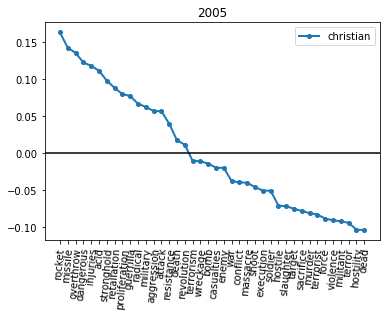

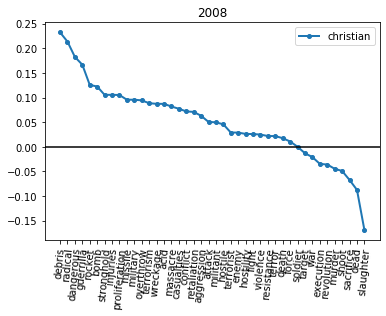

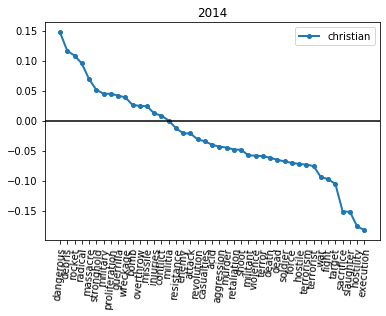

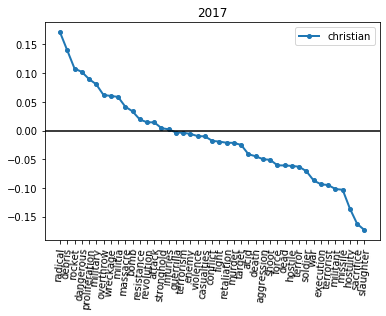

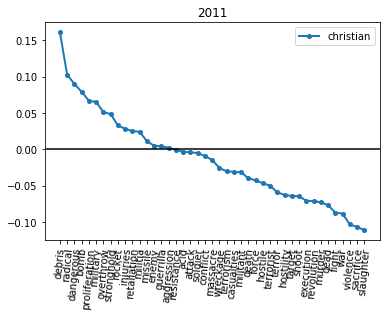

In [5]:
from plot_utils import get_bias_plot
male_bias_dict_for_all_embeddings = calculate_bias_for_all_embedding(association_dict=association_dict, 
                                                                     target_label = target_group_labels[0], 
                                                                     reference_labels = reference_group_labels)

get_bias_plot(bias_dict=male_bias_dict_for_all_embeddings, b2e_dict=b2e_dict, bias_label = reference_group_labels[1])

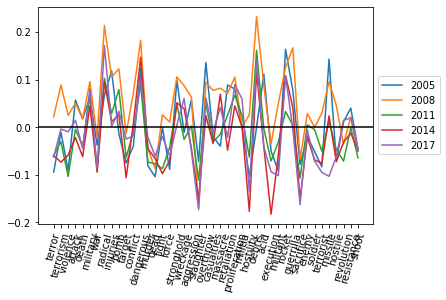

In [6]:
get_all_bias_in_single_plot_label_vs_year(bias_dict=male_bias_dict_for_all_embeddings, words=TERROR_WORDS, labels=TERROR_WORD_ENGLISH)

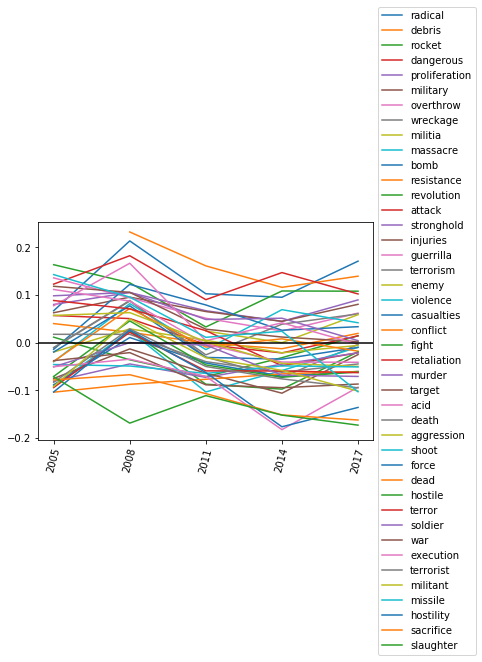

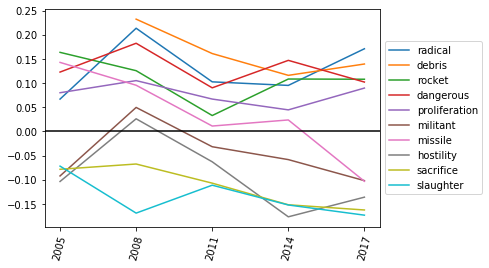

In [7]:
# print(male_bias_dict_for_all_embeddings)
get_all_bias_in_single_plot_year_vs_label(male_bias_dict_for_all_embeddings, b2e=b2e_dict)

get_all_bias_in_single_plot_year_vs_label(male_bias_dict_for_all_embeddings, b2e=b2e_dict, limit = 5)


In [8]:
import pandas as pd
df = pd.DataFrame.from_dict(male_bias_dict_for_all_embeddings)

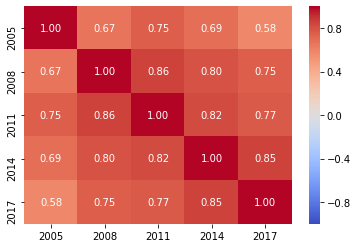

In [9]:
get_correlation_heatmap(df=df)